In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir(os.path.join('..','data'))
df = pd.read_csv(r'2002FemPreg.csv',low_memory=False)
df_live = df[df['outcome']==1]
# removing null values
df = df_live[df_live['totalwgt_lb'].notnull()]
df = df[['caseid','prglngth','outcome','pregordr','birthord','totalwgt_lb','agepreg','finalwgt']]

In [3]:
# computing the mean from pmf
# Sum(x.Px)
import math

def calc_pmf_mean_std(key,df):
    freq = df[key].value_counts().sort_index()
    freq_sum = sum(freq)
    pmf = freq/freq_sum
    x,y = pmf.index,pmf.values
    mean = sum(x*y)
    std = math.sqrt(sum(y*((x-mean)**2)))
    return mean,std
mean,std = calc_pmf_mean_std('prglngth',df)

In [4]:
df['prglngth'].mean()

38.57059083868113

In [5]:
mean

38.57059083868112

In [6]:
df['prglngth'].std()

2.687197732330471

In [7]:
std

2.687049067135258

In [8]:
# question 2
# compute the difference between the pregnency length case id wise
df  = df[df['prglngth']>37]
# 1. first record the occurence of the caseids in terms of indices
from collections import defaultdict
def makeCaseIndices(df):
    d = defaultdict(list)  # make default dict with list as values
    for index,caseid in df['caseid'].iteritems():
        d[caseid].append(index)
    return d
    
indices = makeCaseIndices(df)

def pairwise_mean(listoflist):
    mean_list = []
    for list1 in listoflist:
        mean_list.append(np.mean(list1))
    return mean_list

for caseid,indices in indices.items():
    prglens = df.loc[indices]['prglngth'].values
    difference = []
    if len(prglens) >= 2:
        first = prglens[0]
        others = prglens[1:]
        diff = [first - x for x in others]  # list contaning pairwise difference
        difference.extend(diff)


In [32]:
type(indices)

collections.defaultdict

In [51]:
def pairwise_differences(key):
    indices = makeCaseIndices(df)
    differences = []
    for caseid,index in indices.items():
        lengths = df.loc[index][key].values
        if len(lengths) > 1:
            first= lengths[0]
            others= lengths[1:]
            diffs = first - [x for x in others]
            
            differences.extend(diffs)
    return differences
        

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 2.100e+01,
        0.000e+00, 0.000e+00, 3.000e+01, 0.000e+00, 1.480e+02, 0.000e+00,
        2.160e+02, 0.000e+00, 2.449e+03, 0.000e+00, 2.820e+02, 0.000e+00,
        0.000e+00, 2.500e+02, 0.000e+00, 8.800e+01, 0.000e+00, 4.100e+01,
        0.000e+00, 1.600e+01, 0.000e+00, 5.000e+00]),
 array([-12.  , -11.55, -11.1 , -10.65, -10.2 ,  -9.75,  -9.3 ,  -8.85,
         -8.4 ,  -7.95,  -7.5 ,  -7.05,  -6.6 ,  -6.15,  -5.7 ,  -5.25,
         -4.8 ,  -4.35,  -3.9 ,  -3.45,  -3.  ,  -2.55,  -2.1 ,  -1.65,
         -1.2 ,  -0.75,  -0.3 ,   0.15,   0.6 ,   1.05,   1.5 ,   1.95,
          2.4 ,   2.85,   3.3 ,   3.75,   4.2 ,   4.65,   5.1 ,   5.55,
          6.  ]),
 <a list of 40 Patch objects>)

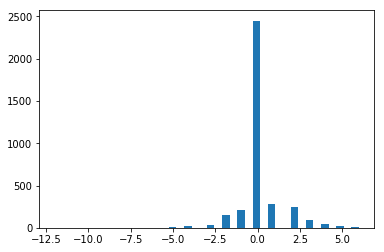

In [52]:
plt.hist(pairwise_differences('prglngth'),bins=40)